In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def getDf():
    files = {}
    for size in [1000, 10000, 100000, 1000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        dfs[k] = df
    df = dfs['size1000']
    for s in [10000, 100000, 1000000]:
        df = pd.concat([df, dfs["size{}".format(s)]])
        
    df.astype({ "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32",
              "method": 'category', "type": 'category'})
    df[df['method']] = 
    return df

In [36]:
df = getDf()

In [37]:
df

,datastructure,method,type,size,inittime,addtime,totaltime
1,[RustVector],"""memcpy""","""Integer""",1000,3409,525,93625
2,[RustVector],"""memcpy""","""Integer""",1000,4746,468,94584
3,[RustVector],"""memcpy""","""Integer""",1000,4549,546,99808
4,[RustVector],"""memcpy""","""Integer""",1000,7993,800,105417
5,[RustVector],"""memcpy""","""Integer""",1000,8519,452,98326
...,...,...,...,...,...,...,...
26,[RustVector],"""clone""","""String""",1000000,11003,103485348,7427339353
27,[RustVector],"""clone""","""String""",1000000,9444,102159956,7469493950
28,[RustVector],"""clone""","""String""",1000000,8404,103144017,7456105486
29,[RustVector],"""clone""","""String""",1000000,8022,103957065,7489299675


In [21]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()

In [26]:
df_average

,method,type,size,inittime,addtime,totaltime
0,"""clone""","""Integer""",1000,5470.6,5180.2,1.091852e+05
1,"""clone""","""Integer""",10000,5303.6,25381.2,9.206360e+05
2,"""clone""","""Integer""",100000,7050.8,285329.8,9.192784e+06
3,"""clone""","""Integer""",1000000,12043.4,2619108.0,9.085773e+07
4,"""clone""","""String""",1000,4686.2,123911.4,7.644341e+06
5,"""clone""","""String""",10000,6063.2,1100417.2,7.415805e+07
6,"""clone""","""String""",100000,7587.2,10541858.0,7.450864e+08
7,"""clone""","""String""",1000000,9155.0,103389636.8,7.462625e+09
8,"""memcpy""","""Integer""",1000,5843.2,558.2,9.835200e+04
9,"""memcpy""","""Integer""",10000,5193.8,22924.6,9.409390e+05


In [41]:
df_avg_int = df_average[df_average["type"] == '"Integer"']

In [42]:
df_avg_int

,method,type,size,inittime,addtime,totaltime
0,"""clone""","""Integer""",1000,5470.6,5180.2,109185.2
1,"""clone""","""Integer""",10000,5303.6,25381.2,920636.0
2,"""clone""","""Integer""",100000,7050.8,285329.8,9192783.6
3,"""clone""","""Integer""",1000000,12043.4,2619108.0,90857734.8
8,"""memcpy""","""Integer""",1000,5843.2,558.2,98352.0
9,"""memcpy""","""Integer""",10000,5193.8,22924.6,940939.0
10,"""memcpy""","""Integer""",100000,7448.2,256154.2,9134579.4
11,"""memcpy""","""Integer""",1000000,10174.8,2564543.0,90401310.6
16,"""onebyone""","""Integer""",1000,6399.4,148429.4,250260.4
17,"""onebyone""","""Integer""",10000,4833.6,1526654.2,2443550.2


In [68]:
df_avg_string = df_average[df_average["type"] == '"String"']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


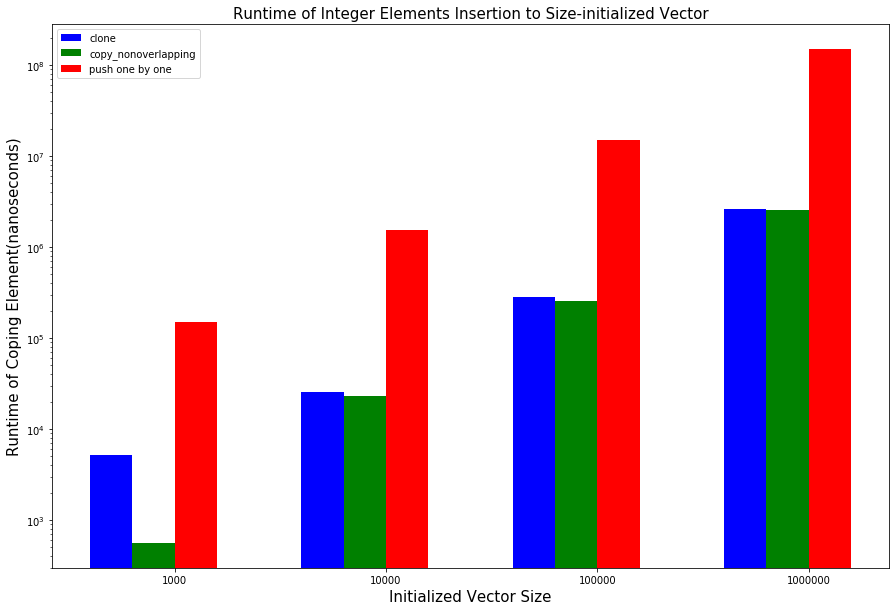

In [69]:
clone = df_avg_int[df_avg_int["method"] == '"clone"']
memcpy = df_avg_int[df_avg_int["method"] == '"memcpy"']
onebyone = df_avg_int[df_avg_int["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx, memcpy['addtime'], width = w, color ='g', align = 'center')
b3 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx + w / 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3), ("clone", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_integer.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


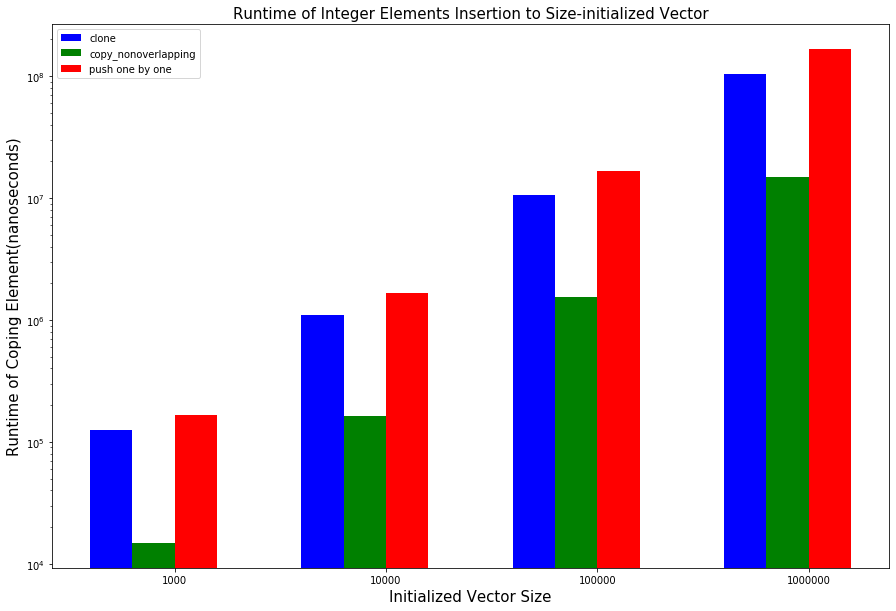

In [70]:
clone = df_avg_string[df_avg_string["method"] == '"clone"']
memcpy = df_avg_string[df_avg_string["method"] == '"memcpy"']
onebyone = df_avg_string[df_avg_string["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx, memcpy['addtime'], width = w, color ='g', align = 'center')
b3 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx + w / 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3), ("clone", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_string.eps")
plt.show()